In [26]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tools.tools import add_constant

import matplotlib.pyplot as plt

Importo BTC e NASDAQ100 da Yahoo Finance

In [18]:
btc       = yf.Ticker("BTC-USD").history("10y")['Close']
nasdaq100 = yf.Ticker("^NDX").history("10y")['Close']

data = pd.concat([btc, nasdaq100], axis=1).dropna()  # dropna() perchè nasdaq quota il weekend
data.columns = ['BTC', 'NASDAQ100']
data = np.log(data).diff().dropna()  # calcolo i log-returns

Calcolo il valore vero di Beta

In [20]:
Y = data['BTC'].to_numpy()
X = add_constant(data['NASDAQ100']).to_numpy()

coeffs = np.linalg.inv(X.T @ X) @ X.T @ Y

print(f"Alpha: {coeffs[0]}")
print(f"Beta: {coeffs[1]}")

Alpha: 0.0020092845688185115
Beta: 0.5785474803059913


Ora genero le epsilon in modo casuale (da una normale con media 0 e varianza pari a quella delle Y)

In [55]:
samples = 1000

samp_epsilon = []
samp_y       = []
samp_coeffs  = []

for i in range(samples):
    samp_epsilon.append(
        np.random.normal(0, np.std(Y), size=len(Y))
    )
    samp_y.append(
        X @ coeffs + samp_epsilon[-1]
    )
    samp_coeffs.append(
        np.linalg.inv(X.T @ X) @ X.T @ samp_y[-1]
    )
    
samp_alphas = [s[0]  for s in samp_coeffs]
samp_betas  = [s[1:] for s in samp_coeffs]

Text(0.5, 1.0, 'Montecarlo OLS')

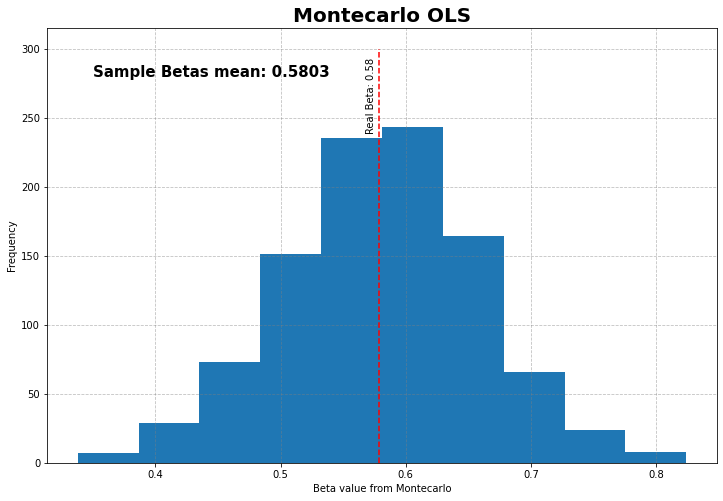

In [90]:
x = [s[0] for s in samp_betas]
plt.figure(figsize=(12, 8))
plt.hist(x, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Beta value from Montecarlo')
plt.vlines(coeffs[1], 0, 300, color='red', linestyle='--')
plt.text(coeffs[1] - 0.01, 240, f'Real Beta: {round(coeffs[1], 2)}', rotation=90)
plt.text(0.35, 280, f'Sample Betas mean: {round(np.mean(x), 4)}', fontsize=15, fontweight='bold')
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.title('Montecarlo OLS', fontweight='bold', fontsize=20)